<a href="https://colab.research.google.com/github/y-bo/python-ml/blob/master/chat_gpt_school_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Используем ChatGPT для ответов на вопросы по тексту.
В нашем конкретном примере представим, что мы хотим подготовиться к экзамену по литературе, возьмем для примера "Преступление и наказание".

Таким же образом можно использовать для поиска по своим заметкам, по учебникам, по любым текстовым документам.

Например, в компании мы пробовали использовать этот сценарий для поиска ответов в базе знаний - например, как настроить интернет на новом компьютере? Как послать документ на печать? И т.п.

Важно! Не отправляем конфиденциальную информацию.

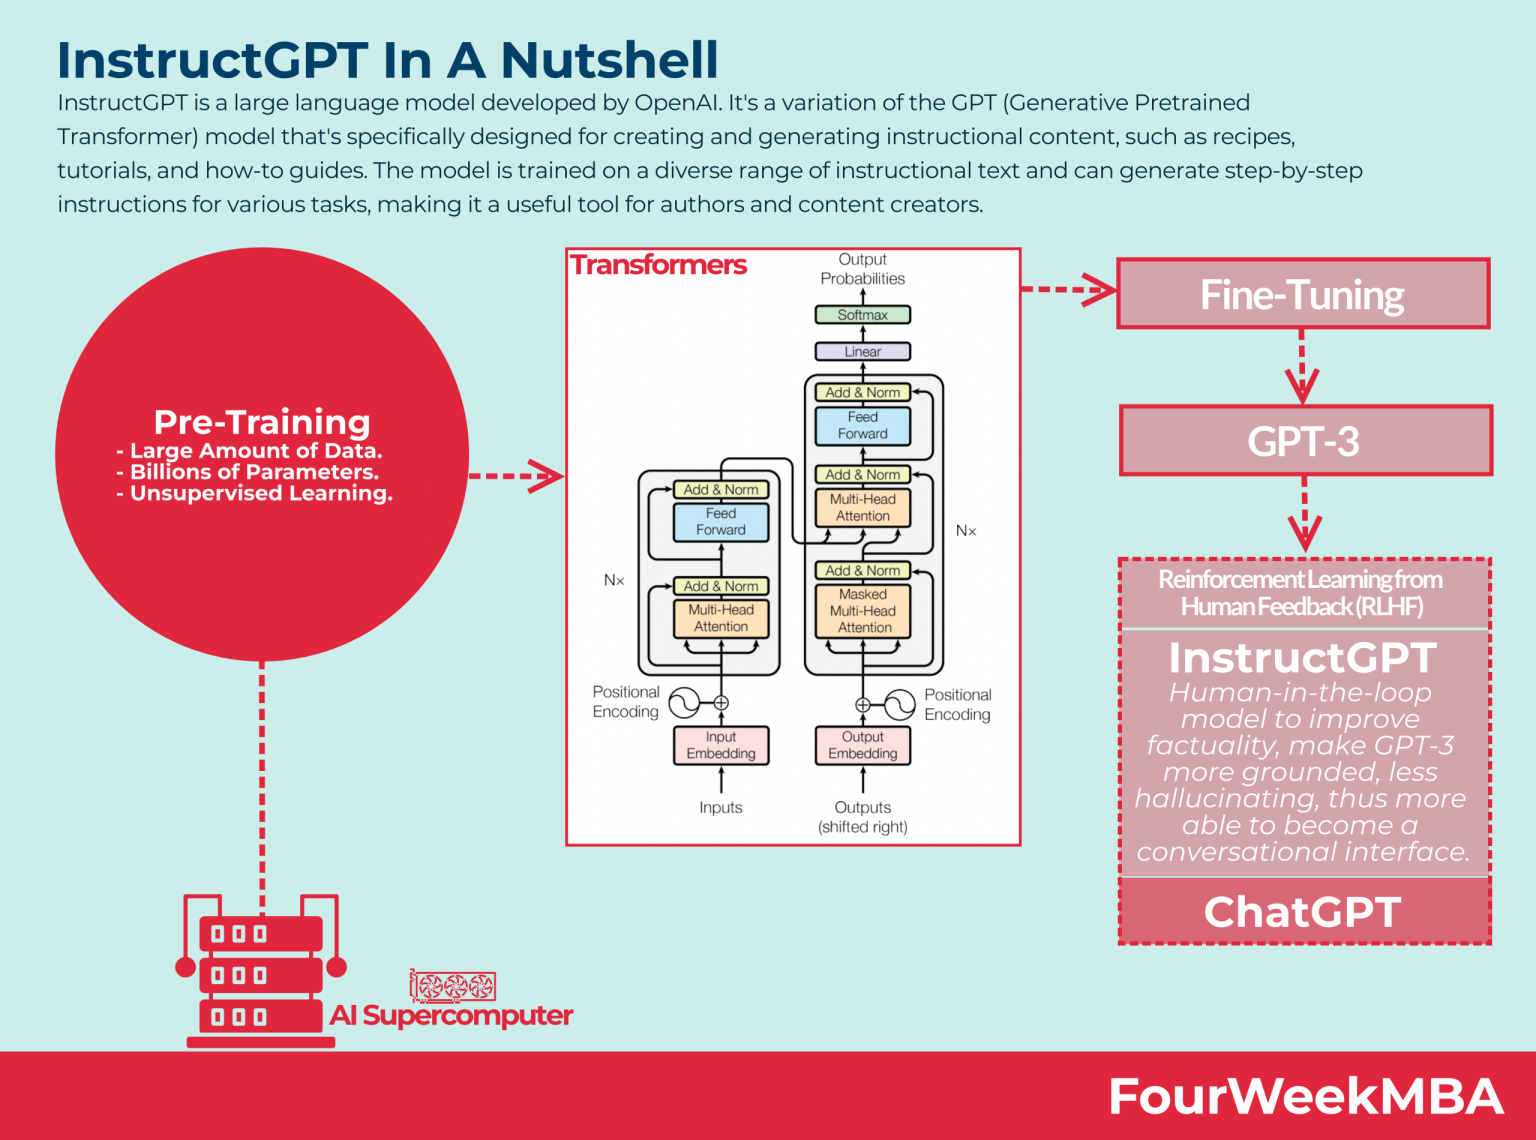

## Из чего состоит вопросно-ответная система



1. Нам нужна база данных для поиска - подготовим текст произведения для поиска по нему

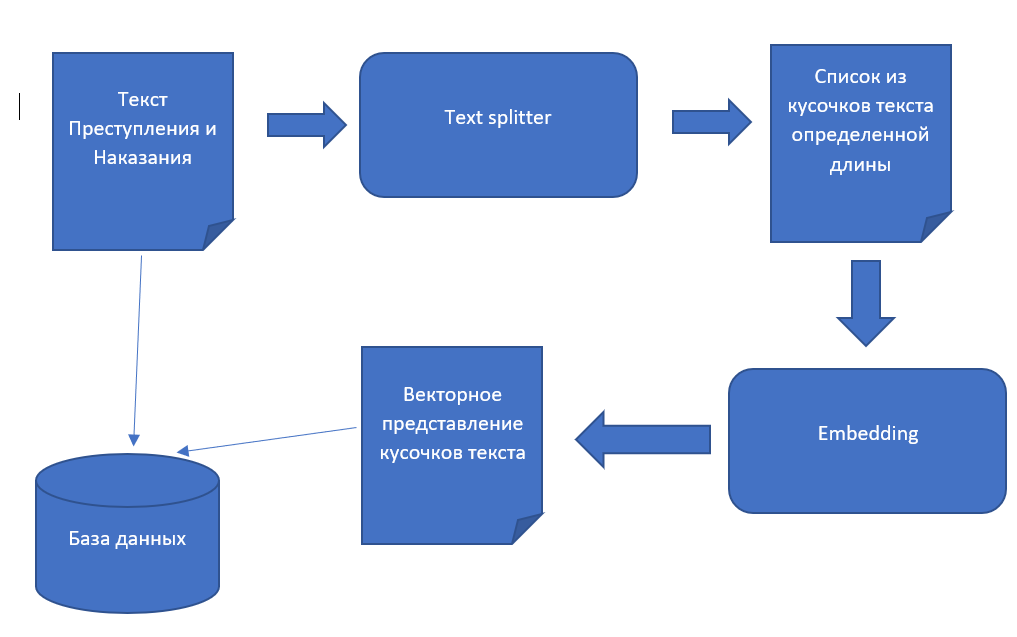

2. Схема вопросно-ответной системы

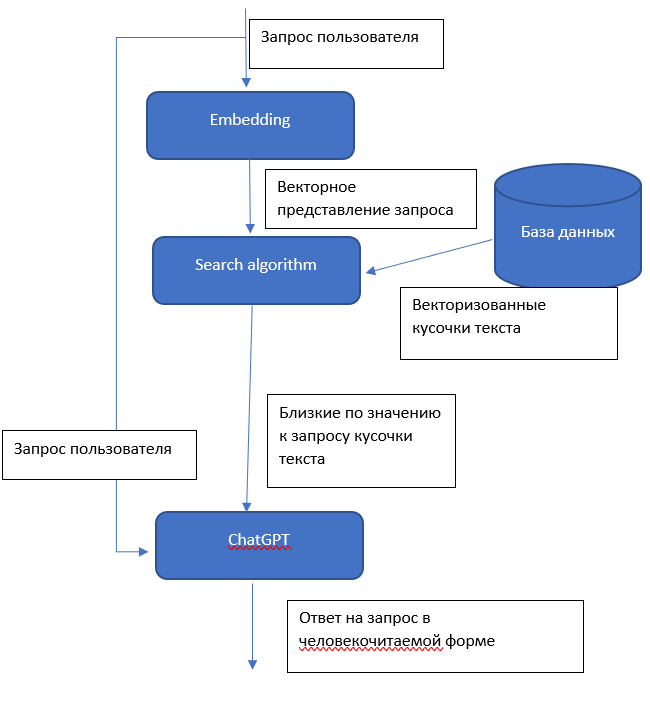

## Установим необходимые библиотеки

In [ ]:
!pip install langchain langchain_openai sentence-transformers

In [ ]:
import os
from google.colab import userdata

from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import SKLearnVectorStore

from langchain_openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA

## Подготовка БД
(в данном случае ее уже заранее подготовили)

In [ ]:
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
embeddings = OpenAIEmbeddings()

In [ ]:
# with open("/content/prestuplenie-i-nakazanie.txt", 'r') as f:
#  full_text = f.read()

In [ ]:
# text_splitter = CharacterTextSplitter(separator=" ", chunk_size=500, chunk_overlap=50)
# text_chunks = text_splitter.split_text(full_text)

In [ ]:
#db = SKLearnVectorStore.from_texts(
#    texts=text_chunks,
#    embedding=embeddings,
#    persist_path='/content/doc_storage/doc_storage.json',
#)

In [ ]:
#db.persist()

In [ ]:
! wget -O doc_storage.json https://www.dropbox.com/scl/fi/40zkwd8znb0qaj57po294/doc_storage.json?rlkey=p2mwen3hhlyug5qf4yiyc986z&dl=0


--2024-02-20 10:29:46--  https://www.dropbox.com/scl/fi/40zkwd8znb0qaj57po294/doc_storage.json?rlkey=p2mwen3hhlyug5qf4yiyc986z
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc91ea6285a5bdba1ae0bebf61ca.dl.dropboxusercontent.com/cd/0/inline/CNodW__ae6Kid1aNM53bLjH9ByCgIx7T4eUSBZnSqYOCaXyxavg1y3hRazkpS__0SaHpukalMh0P44N9idV7Gf3Eii_R7KylV-V5kbhnqauDR_z44lSHc27GEAHxAVKF9huGXZ6VnSqdEO6wF98y1ZIE/file# [following]
--2024-02-20 10:29:48--  https://uc91ea6285a5bdba1ae0bebf61ca.dl.dropboxusercontent.com/cd/0/inline/CNodW__ae6Kid1aNM53bLjH9ByCgIx7T4eUSBZnSqYOCaXyxavg1y3hRazkpS__0SaHpukalMh0P44N9idV7Gf3Eii_R7KylV-V5kbhnqauDR_z44lSHc27GEAHxAVKF9huGXZ6VnSqdEO6wF98y1ZIE/file
Resolving uc91ea6285a5bdba1ae0bebf61ca.dl.dropboxusercontent.com (uc91ea6285a5bdba1ae0bebf61ca.dl.dropboxusercontent.com)... 162.125.13.15

In [ ]:
db = SKLearnVectorStore(
    embedding=embeddings, persist_path='/content/doc_storage.json')

In [ ]:
db.similarity_search("Какие главные темы романа?")

[Document(page_content='Annotation\n\n\n«Преступление и наказание» – гениальный роман, главные темы которого: преступление и наказание, жертвенность и любовь, свобода и гордость человека – обрамлены почти детективным сюжетом.\n\nМногократно экранизированный и не раз поставленный на сцене, он и по сей день читается на одном дыхании.\n\n\n\n\n\n* * *\n\n\n\nЧасть перваяI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\n\n\n\n\nЧасть втораяI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\n\n\n\n\nЧасть третьяI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\n\n\n\n\nЧасть четвертаяI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\n\n\n\n\nЧасть', metadata={'id': '2b8086a1-5645-48c7-866d-8eda2adec14d'}),
 Document(page_content='Annotation\n\n\n«Преступление и наказание» – гениальный роман, главные темы которого: преступление и наказание, жертвенность и любовь, свобода и гордость человека – обрамлены почти детективным сюжетом.\n\nМногократно экранизированный и не раз поставленный на сцене, он и по сей день читается на одном дыхании.\n\n\n

## Подготовим вопросно-ответную систему

In [ ]:
llm = OpenAI(temperature=0.9)
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(),
    return_source_documents=True,
    verbose=True
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


## Готово! Можем задавать вопросы

1. Как Достоевский раскрывает образ преступного мира, описывая Петербург?

2. Как родилась у Раскольникова мысль об убийстве старухи? Легко ли он принял ее?

3. Какой мотив преступления из тех, которые Раскольников назвал Соне, является ведущим?

4. Как начинается «наказание» героя? Как и почему изменилась его жизнь после убийства?

5. Что понял Раскольников во время встречи с матерью и сестрой?

6. Почему после убийства старухи и Лизаветы Соня Мармеладова становится ему ближе всех людей?

7. Какое место в романе занимают Лужин и Свидригайлов?

8. Почему Раскольников не сможет жить по лужинскому принципу «все позволено»?

9. В чем раскаивается Раскольников: в том, что старуху убил, или в том, что не смог стать достаточно сильным, чтобы презреть муки совести? Почему он делает «явку с повинной»?

10. На что рассчитывает Порфирий Петрович?

11. В чем видит Достоевский путь к общечеловеческому братству?

12. В чем отличие «Преступления и наказания» от детективных романов?


In [ ]:
response = qa_stuff("Кто такой Достоевский?")
response



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'Кто такой Достоевский?',
 'result': ' Достоевский - один из наиболее известных русских писателей, автор множества классических произведений, таких как "Преступление и наказание" и "Братья Карамазовы".',
 'source_documents': [Document(page_content='хотел только узнать теперь, кто вы такой, потому что, видите ли, к общему-то делу в последнее время прицепилось столько разных промышленников и до того исказили они все, к чему ни прикоснулись, в свой интерес, что решительно все дело испакостили. Ну-с, и довольно!\n\n– Милостивый государь, – начал было г-н Лужин, коробясь с чрезвычайным достоинством, – не хотите ли вы, столь бесцеремонно, изъяснить, что и я…\n\n– О, помилуйте, помилуйте… Мог ли я!.. Ну-с, и довольно! – отрезал Разумихин и круто', metadata={'id': '607cd9ff-dc87-464f-bea7-c8dcba0ce8d3'}),
  Document(page_content='и видимся.\n\n– Кто такой?\n\n– Да прозябал всю жизнь уездным почтмейстером… пенсионишко получает, шестьдесят пять лет, не стоит и говорить… Я его, впрочем,